In [1]:
import itertools
import random
import json
import matplotlib.pyplot as plt
import pandas
from pathlib import Path 
import math

In [2]:
# d = dictionary
# keys k are Id of authors (the data has not been consolidated)
# d[k]  is a dictionary, the keys y are 1990 ... 2018.
# note that len(d[k])=29 for all k
# d[k][y] is the number of publications of author k in year y.
d = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data/requested_data_on_authors.json')))

In [14]:
noPubliGuys = set()

for k in d.keys():
    a =0
    for i in d[k].keys():
        a += d[k][i]
    if a ==0:
        noPubliGuys.add(k)

print(len(noPubliGuys))

0


In [15]:
authorsPresentInDataCollab = set()

twiceTotalNumberCollabCompSciences = 0

nbrNewAuthorsPerYear = []
#initial = true

for year in range(1990,2019):
    
    collabCurrentYear = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_'+str(year)+'.json')))
    for i in collabCurrentYear.keys():
        authorsPresentInDataCollab.add(i)
        twiceTotalNumberCollabCompSciences += collabCurrentYear[i]
    #if initial:
    nbrNewAuthorsPerYear.append(len(authorsPresentInDataCollab))
    
print(len(authorsPresentInDataCollab))
print(twiceTotalNumberCollabCompSciences/2)
print(nbrNewAuthorsPerYear)

258145
12578943.0
[1742, 3314, 5142, 7564, 10107, 13159, 16961, 21164, 26029, 30164, 35264, 40318, 47021, 53659, 60886, 68937, 79188, 89986, 102744, 115592, 129403, 142746, 157346, 172648, 189068, 204988, 222045, 239420, 258145]


In [13]:
dComputScience = dict()

# nbr of publis weighted by number of authors, i.e., 1 publi with 5 authors counts for 5 publis
totalPublisCompScience = 0

for k in d:
    if k in authorsPresentInDataCollab:
        dComputScience[k]=d[k]
        for j in dComputScience[k].keys():
            totalPublisCompScience += dComputScience[k][j]

print(len(dComputScience))
print(totalPublisCompScience)
print(len(dComputScience)/totalPublisCompScience)
print(len(dComputScience)/(twiceTotalNumberCollabCompSciences/2))

232839
5953613
0.039108857092323604
0.018510219817356673


In [38]:
authorsDeadAfter2014 = set()
authorsDeadAfter2014Dict = dict()

distribFinalDegree = dict()

#collabCurrentYear2013 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_2013.json')))
collabCurrentYear2014 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_2014.json')))
collabCurrentYear2015 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_2015.json')))
collabCurrentYear2016 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_2016.json')))
collabCurrentYear2017 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_2017.json')))
collabCurrentYear2018 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_2018.json')))


#collabCurrentYear2013 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_2013.json')))
#collabCurrentYear2014 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_2014.json')))
#collabCurrentYear2015 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_2015.json')))
#collabCurrentYear2016 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_2016.json')))
#collabCurrentYear2017 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_2017.json')))
#collabCurrentYear2018 = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_2018.json')))


#for i in collabCurrentYear2013.keys():
for i in authorsPresentInDataCollab:
    a =0
    #if i in collabCurrentYear2014.keys():
    #    a += collabCurrentYear2014[i]
    #if i in collabCurrentYear2015.keys():
    #    a += collabCurrentYear2015[i]
    #if i in collabCurrentYear2016.keys():
    #    a += collabCurrentYear2016[i]
    #if i in collabCurrentYear2017.keys():
    #    a += collabCurrentYear2017[i]
    if i in collabCurrentYear2018.keys():
        a += collabCurrentYear2018[i] 
    
    #a += len(collabCurrentYear2014[i])
    #a += len(collabCurrentYear2015[i])
    #a += len(collabCurrentYear2016[i]) 
    #a += len(collabCurrentYear2017[i]) 
    #a += len(collabCurrentYear2018[i]) 
    
    if a ==0:
        authorsDeadAfter2014.add(i)
        

        
nbrDead = len(authorsDeadAfter2014)
        
for year in range(1990,2019):
    
    #x = 10
    
    #print('#####################')
    #print('#####################')
    collabCurrentYear = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_'+str(year)+'.json')))
    for i in authorsDeadAfter2014:
        if i in collabCurrentYear.keys():
            collab = collabCurrentYear[i]
            #if x>0:
            #    print('I was there')
            #    print(collab)
            for j in range(0,len(collab)):
                if i in authorsDeadAfter2014Dict.keys():
                    authorsDeadAfter2014Dict[i].add(j)
                else:
                    authorsDeadAfter2014Dict[i]=set([j])
                #if x>0:
                #    print(authorsDeadAfter2014Dict)
            #x =-1
totalCollabOfDeadAuthors = 0 
maxi = 0

for i in authorsDeadAfter2014Dict.keys():
    l = len(authorsDeadAfter2014Dict[i])
    totalCollabOfDeadAuthors += l
    if l in distribFinalDegree.keys():
        distribFinalDegree[l]+=1
    else: 
        distribFinalDegree[l]=1
        if l> maxi :
            maxi = l
            
average = totalCollabOfDeadAuthors/nbrDead

print('nbrDead = {}'.format(nbrDead))
print('maxi = {}'.format(maxi))
print('average = {}'.format(average))
print(distribFinalDegree)
print(authorsDeadAfter2014)

plt.clf()
myList = distribFinalDegree.items()
myList = sorted(myList)
x, y = zip(*myList)
#plt.yscale('log')
#plt.xscale('log')
plt.plot(x, y)
plt.xlabel('cumul number of collabs')
plt.ylabel('nbr of authors')
plt.show()



    
#for year in range(1990,2019):   
#    collabCurrentYear = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_'+str(year)+'.json')))
#    print(len(collabCurrentYear))


nbrDead = 3044
maxi = 0
average = 0.0
{}
{'7004498448', '6602160382', '25625882000', '36861548400', '6507983733', '7003482755', '7103033474', '7005902207', '56879677200', '6507914472', '23978326300', '7006451795', '15820402900', '57188869824', '35973953200', '24326370900', '57191409885', '55632938100', '56902460000', '57195683252', '6602390629', '6507849486', '36544731600', '57205491417', '6603087666', '7004025895', '25938167900', '55905604600', '36719246900', '16549389200', '13611596600', '56039791300', '55597824900', '57195642779', '6602975441', '56263767200', '56058587500', '55963950700', '6603696040', '57112647800', '57198394235', '8272583500', '24353049800', '57202997859', '55944480200', '24286369000', '6603270018', '57197947735', '55880168500', '56901145000', '55547115906', '6602688914', '15058501200', '35264525500', '57188623356', '26649024400', '56442177300', '55135787900', '36468111100', '6507714348', '57195243166', '7007163392', '36626531700', '7004865464', '6506408274', '559

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 432x288 with 0 Axes>

In [32]:
for year in range(1990,2019):
    collabCurrentYearTest = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_'+str(year)+'.json')))
    if '6603651996' in collabCurrentYearTest.keys():
        print(year)
        print(collabCurrentYearTest['6603651996'])

2003
[]
2004
[]
2005
[]
2006
[]
2007
[]
2008
[]
2009
[]
2010
[]
2011
[]
2012
[]
2013
[]
2014
[]
2015
[]
2016
[]
2017
[]
2018
[]


totalCollabAllAuthors =3182764
maxiAll =689
nbrAuthors =255101
average =12.476485784062


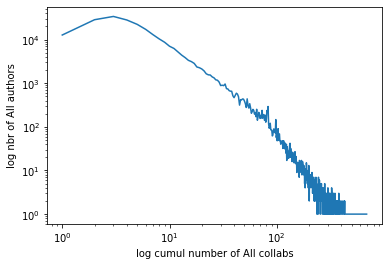

In [2]:
distribAllDegree = dict()
AllColabPerAuthorCS = dict()

for year in range(1990,2019):
    
    collabCurrentYear = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_'+str(year)+'.json')))
    for author in collabCurrentYear.keys():
        collabList = collabCurrentYear[author]
        l = len(collabList)
        for collab in range(0,l):
            if author in AllColabPerAuthorCS.keys():
                AllColabPerAuthorCS[author].add(collabList[collab])
            else:
                AllColabPerAuthorCS[author]=set([collabList[collab]])
                
totalCollabAllAuthors = 0 
maxiAll = 0
nbrAuthorsWithCollab = len(AllColabPerAuthorCS)

for author in AllColabPerAuthorCS.keys():
    l = len(AllColabPerAuthorCS[author])
    totalCollabAllAuthors += l
    if l in distribAllDegree.keys():
        distribAllDegree[l]+=1
    else: 
        distribAllDegree[l]=1
        if l> maxiAll :
            maxiAll = l
            
print("totalCollabAllAuthors ={}".format(totalCollabAllAuthors))
print("maxiAll ={}".format(maxiAll))
print("nbrAuthors ={}".format(nbrAuthorsWithCollab))
print("average ={}".format(totalCollabAllAuthors/nbrAuthorsWithCollab))

plt.clf()
myList = distribAllDegree.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, y)
plt.xlabel('log cumul number of All collabs')
plt.ylabel('log nbr of All authors')
plt.show()


In [14]:
continuer = 10
smallList = []
for author in AllColabPerAuthorCS.keys():
    if continuer>0:
        smallList.append(author)
        continuer = continuer -1
    else:
        break
    #print(continuer)

print(smallList)

for i in range(0,3):
    x = smallList[i]
    print('Author = {}'.format(x))
    for year in range(1990,2019):
        collabCurrentYear = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/neighbours_'+str(year)+'.json')))
        if x in collabCurrentYear.keys():
            #print(year)
            print(collabCurrentYear[x])
        nbrcollabCurrentYear = json.load(open(Path('/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/collaborations_'+str(year)+'.json')))
        if x in nbrcollabCurrentYear.keys():
            #print(year)
            print(nbrcollabCurrentYear[x])
        

['7003786915', '6603564868', '6701907288', '7004477117', '56208284000', '57062614600', '6602402636', '6505865105', '57197947716', '6506574625']
Author = 7003786915
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868']
1
['6603564868', '23134894300']
2
['6603564868', '23134894300']
2
['6603564868', '23134894300']
2
['6603564868', '23134894300']
2
['6603564868', '23134894300']
2
Author = 6603564868
['7003786915']
1
['7003786915']
1
['7003786915']
1
['7003786915']
1
['7003786915']
1
['7003786915']
1
['7003786915', '6602938110']
2
['7003786915', '6602938110']
2
['7003786915', '6602938110']
2
['7003786915', '6602938110', '16507910400']
3
['70037